<a href="https://colab.research.google.com/github/Yewon-Song/ML_project23/blob/main/HAR_0528.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Human Activity Recognition ML Project-SSONG**

just a setup

In [ ]:
%pip install tsfel scipy scikit-learn pandas plotly numpy matplotlib seaborn nbformat imblearn --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.3 MB/s eta 0:00:00


Defining global variables

In [ ]:
DO_CLEANING = True         # set to True if you want to clean the data. the data is mostly clean already
FEATURE_EXTRACTION = True   # set to False if you want to skip feature extraction as it takes a while to run
SAVE_FEATURES = True        # Saving features to disk so you can skip feature extraction in the future
DO_MACHINE_LEARNING = True  # set to False if you want to skip experimental machine learning

USE_ALL_DATA = True        # set to True if you want to use all the data, not just the gyroscope data
USE_ALL_FEATURES = False   # set to True if you want to use all the features during the training phase
SEGMENT_ALL_DATA = False   # set to True if you want to segment all the data, not just the gyroscope data
USE_SEGMENTED_DATA = False  # set to True if you want to use segmented data, not the whole data

# **Load Data** 

In [15]:
import numpy as np 
import pandas as pd 

import os
dirs = []
for dirname, _, filenames in os.walk('/content/drive/MyDrive/HAR_DATASET'):
    for filename in filenames:
        dirs.append(os.path.join(dirname, filename))
print(dirs)

['/content/drive/MyDrive/HAR_DATASET/Walking.csv', '/content/drive/MyDrive/HAR_DATASET/Jogging.csv', '/content/drive/MyDrive/HAR_DATASET/JumpRope.csv', '/content/drive/MyDrive/HAR_DATASET/NewProcessedData.csv', '/content/drive/MyDrive/HAR_DATASET/OriginalProcessedData.csv', '/content/drive/MyDrive/HAR_DATASET/Sitting.csv']


# **Data Preparation**

CONCATENATE ALL THE CSV FILES INTO ONE DATAFRAME

In [ ]:
import pandas as pd
# some of the files are not useful for our purposes, so we will exclude them
# tennis.csv is broken and will be excluded for now
exclusions =  ['NewProcessedData.csv', 'OriginalProcessedData.csv', 'JumpRope.csv']
df = [] 
print("Reading files...")
file_size_sum = 0
for dir in dirs:
    _, filename = os.path.split(dir)
    if not filename in exclusions:
        temp_df = pd.read_csv(dir)
        file_size = round(os.path.getsize(dir) / 1000000, 2)
        print("\t" + "Loading " + filename + " (" + str(file_size) + " MB)"  + "...")
        file_size_sum += file_size
        temp_df['activity'] = os.path.splitext(filename)[0]
        # Sort the data by the time column
        temp_df.sort_values(by=['Time since start in ms '], inplace=True)
        temp_df.reset_index(drop=True, inplace=True)
        df.append(temp_df)
df = pd.concat(df)
print("Total file size loaded: " + str(round(file_size_sum, 2)) + " MB")
print("Final DataFrame of shape " + str(df.shape))

Reading files...
	Loading Walking.csv (0.17 MB)...
	Loading Jogging.csv (0.04 MB)...
	Loading Sitting.csv (1.93 MB)...
Total file size loaded: 2.14 MB
Final DataFrame of shape (18933, 15)


## **Data Cleaning**

### **Duplicate Data**

In [ ]:
# show the entries that are duplicated
print('Number of duplicates in data: {}'.format(sum(df.duplicated())))
df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head(10)

Number of duplicates in data: 8428


,ACCELEROMETER X (m/s²),ACCELEROMETER Y (m/s²),ACCELEROMETER Z (m/s²),GRAVITY X (m/s²),GRAVITY Y (m/s²),GRAVITY Z (m/s²),LINEAR ACCELERATION X (m/s²),LINEAR ACCELERATION Y (m/s²),LINEAR ACCELERATION Z (m/s²),GYROSCOPE X (rad/s),GYROSCOPE Y (rad/s),GYROSCOPE Z (rad/s),Time since start in ms,YYYY-MO-DD HH-MI-SS_SSS,activity
16799,-9.467,1.346,-2.389,-9.347,1.537,-2.537,-0.119,-0.192,0.147,-0.012,0.001,-0.007,2136858,2021-05-18 10:57:12:491,Sitting
16800,-9.467,1.346,-2.389,-9.347,1.537,-2.537,-0.119,-0.192,0.147,-0.012,0.001,-0.007,2136858,2021-05-18 10:57:12:491,Sitting
16801,-9.467,1.346,-2.389,-9.347,1.537,-2.537,-0.119,-0.192,0.147,-0.012,0.001,-0.007,2136859,2021-05-18 10:57:12:492,Sitting
16802,-9.467,1.346,-2.389,-9.347,1.537,-2.537,-0.119,-0.192,0.147,-0.012,0.001,-0.007,2136859,2021-05-18 10:57:12:492,Sitting
16803,-9.467,1.346,-2.389,-9.347,1.537,-2.537,-0.119,-0.192,0.147,-0.012,0.001,-0.007,2136859,2021-05-18 10:57:12:492,Sitting
16804,-9.467,1.346,-2.389,-9.347,1.537,-2.537,-0.119,-0.192,0.147,-0.012,0.001,-0.007,2136860,2021-05-18 10:57:12:493,Sitting
16805,-9.467,1.346,-2.389,-9.347,1.537,-2.537,-0.119,-0.192,0.147,-0.012,0.001,-0.007,2136860,2021-05-18 10:57:12:493,Sitting
16806,-9.467,1.346,-2.389,-9.347,1.537,-2.537,-0.119,-0.192,0.147,-0.012,0.001,-0.007,2136860,2021-05-18 10:57:12:493,Sitting
16807,-9.467,1.346,-2.389,-9.347,1.537,-2.537,-0.119,-0.192,0.147,-0.012,0.001,-0.007,2136861,2021-05-18 10:57:12:494,Sitting
16808,-9.467,1.346,-2.389,-9.347,1.537,-2.537,-0.119,-0.192,0.147,-0.012,0.001,-0.007,2136861,2021-05-18 10:57:12:494,Sitting


### **Remove Duplicate Data**

In [ ]:
if DO_CLEANING:
    df.drop_duplicates(inplace=True)
    print('Number of duplicates in data: {}'.format(sum(df.duplicated())))

Number of duplicates in data: 0


In [ ]:
print('We have {} NaN values in train'.format(df.isnull().values.sum()))

We have 0 NaN values in train


In [ ]:
if DO_CLEANING:
    df.dropna(inplace=True)
    print('We have {} NaN values in train'.format(df.isnull().values.sum()))

We have 0 NaN values in train


## **Data Representation**

**Plot the number of rows per activity**

Sitting    8773
Walking    1432
Jogging     300
Name: activity, dtype: int64


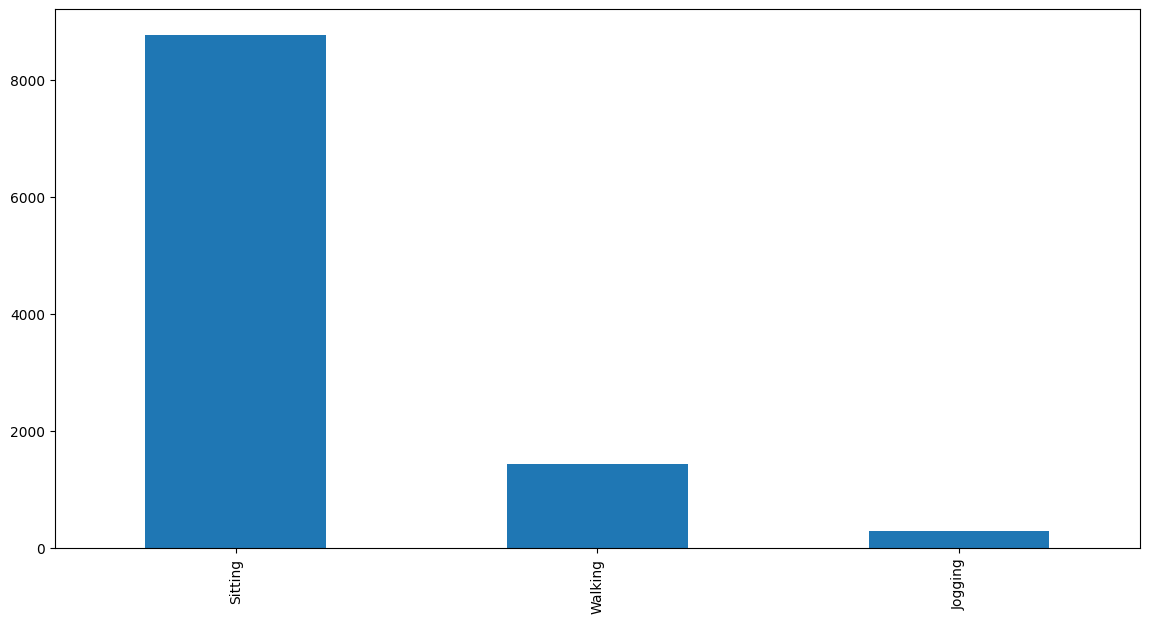

In [ ]:
import matplotlib.pyplot as plt
# eval activities
activity_stats = df.activity.value_counts()
print(activity_stats)

activity_stats.plot(kind='bar',figsize=(14,7))
plt.show()

In [ ]:
import plotly.express as px
fig = px.histogram(pd.DataFrame(df,columns=['activity']), x='activity', title='Data concerning each activity', color="activity")
fig.show()
del fig

### **Y-axis Box Plot** sitting이 0근처임

In [ ]:
fig = px.box(df, x="activity", y="ACCELEROMETER Y (m/s²)")
fig.show()
del fig

### **activity 한 눈에 보기**

In [16]:
activity = df['activity'].unique()[0]
df_activity = df[df['activity'] == activity]
df_activity

,ACCELEROMETER X (m/s²),ACCELEROMETER Y (m/s²),ACCELEROMETER Z (m/s²),GRAVITY X (m/s²),GRAVITY Y (m/s²),GRAVITY Z (m/s²),LINEAR ACCELERATION X (m/s²),LINEAR ACCELERATION Y (m/s²),LINEAR ACCELERATION Z (m/s²),GYROSCOPE X (rad/s),GYROSCOPE Y (rad/s),GYROSCOPE Z (rad/s),Time since start in ms,YYYY-MO-DD HH-MI-SS_SSS,activity
0,1.6986,1.3283,7.0998,1.3923,2.1992,9.4549,0.2390,-0.8760,-1.7939,0.6817,-0.0350,0.3251,15,2021-05-19 16:30:54:431,Walking
1,-0.3003,2.3495,7.4195,-0.9400,2.9550,9.3035,-0.8070,0.0004,1.3390,-0.0641,-0.5154,0.2862,515,2021-05-19 16:30:54:931,Walking
2,0.0323,2.6892,10.9866,-0.5112,4.3556,8.7714,0.8482,-0.2409,0.9526,-0.0594,0.0330,0.4493,1014,2021-05-19 16:30:55:430,Walking
3,1.1324,4.1749,10.4611,-0.3020,4.2144,8.8497,-0.5431,0.3624,0.2033,0.4714,-0.4152,0.2851,1514,2021-05-19 16:30:55:930,Walking
4,-2.7820,4.5281,6.5145,-0.9010,4.0817,8.8712,-1.0443,-1.0017,-1.8377,0.5447,0.3961,0.4867,2014,2021-05-19 16:30:56:430,Walking
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,-2.4981,4.3077,8.3988,-1.8359,3.9292,8.7955,-0.5764,0.7967,-1.2228,-0.5392,-0.2158,0.7177,712868,2021-05-19 16:42:47:284,Walking
1431,-0.6260,3.7451,7.8984,-0.4181,4.9875,8.4333,-0.5197,-1.8844,0.2011,0.2756,-0.0299,0.7710,713368,2021-05-19 16:42:47:784,Walking
1432,3.5578,4.9552,9.0344,1.2485,5.9374,7.7045,0.8653,-0.9992,1.2886,0.5947,-0.6078,-0.1284,713868,2021-05-19 16:42:48:284,Walking
1433,1.6854,4.9457,8.1126,0.7843,5.0623,8.3623,1.3046,0.1330,-0.4811,-0.2625,0.6687,0.2802,714369,2021-05-19 16:42:48:785,Walking


### **3D Accelerometer**

In [ ]:
fig = px.scatter_3d(df_activity, x='ACCELEROMETER X (m/s²)', y='ACCELEROMETER Y (m/s²)', z='ACCELEROMETER Z (m/s²)', color='activity')

fig.show()

### **Time Series Plot**

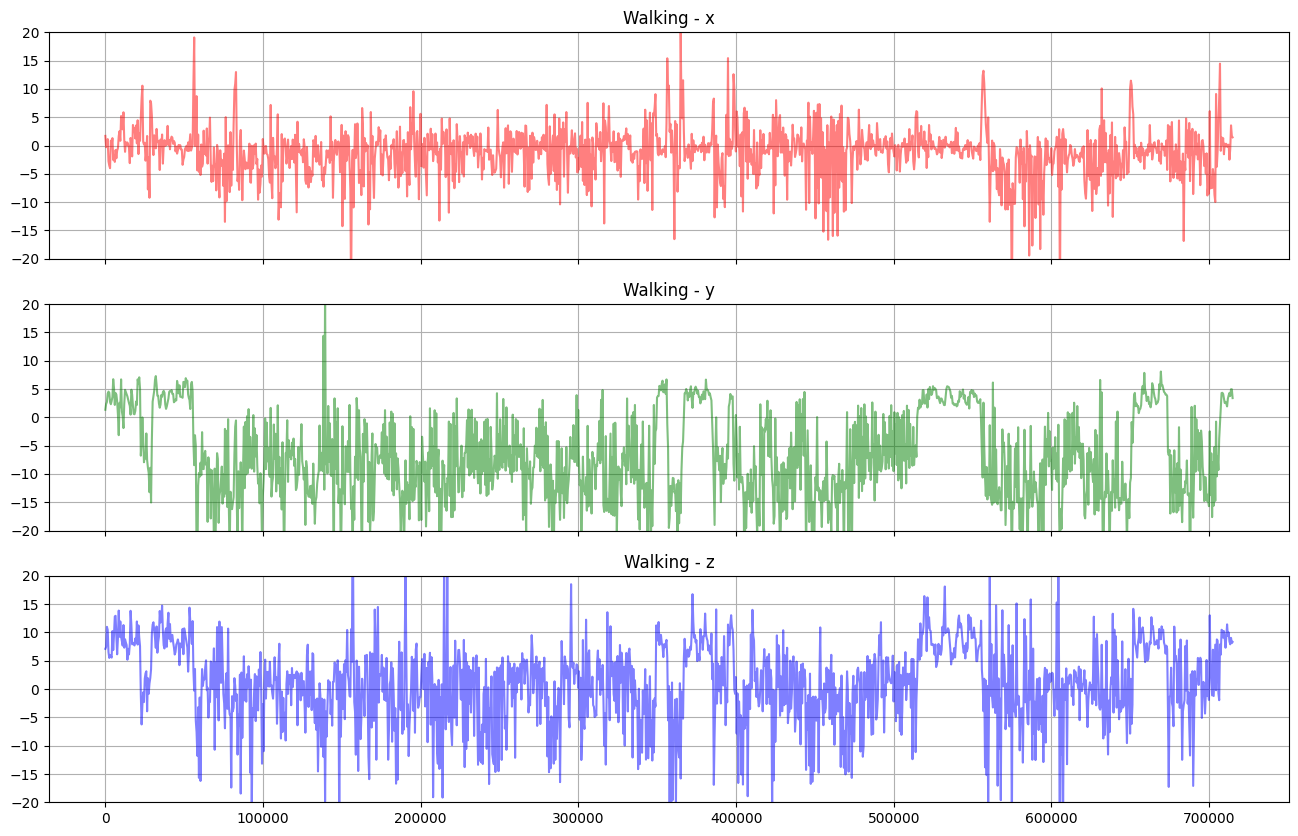

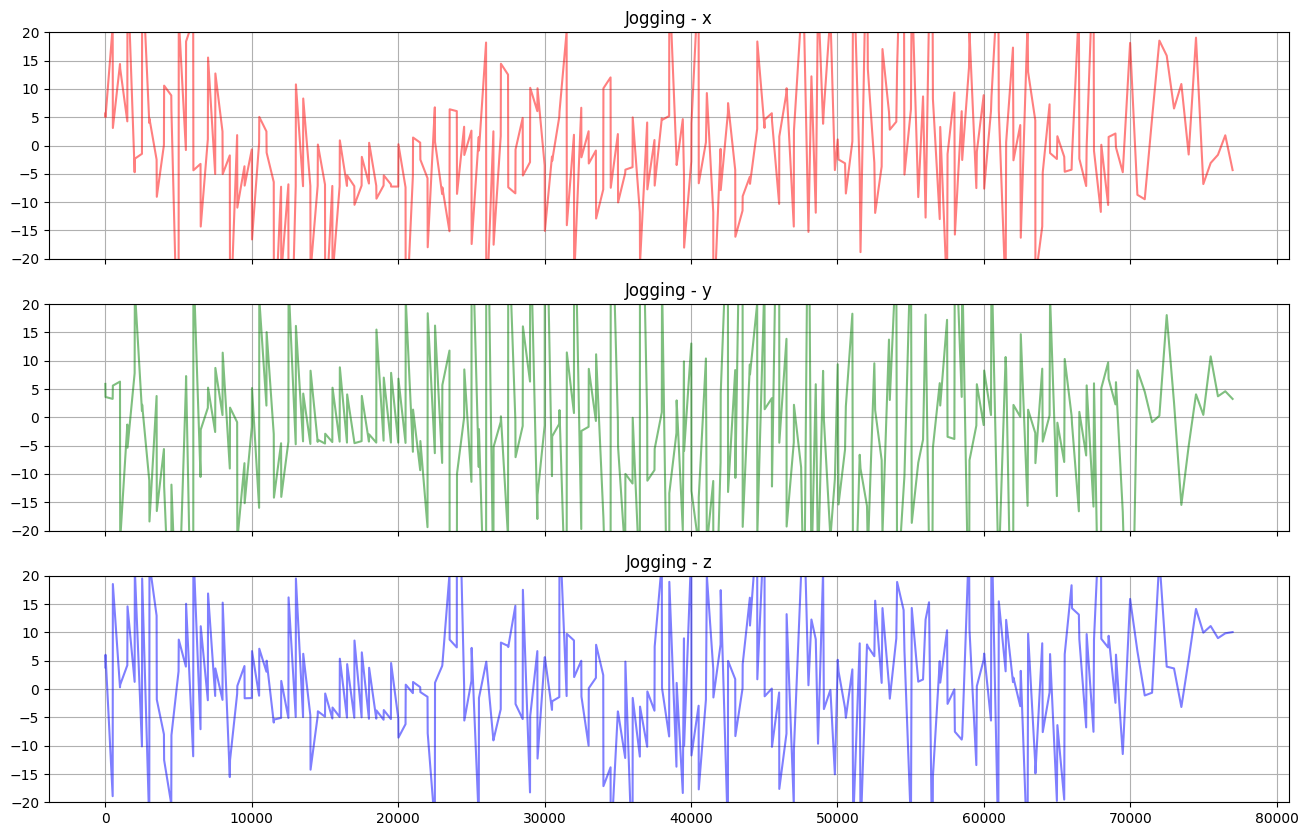

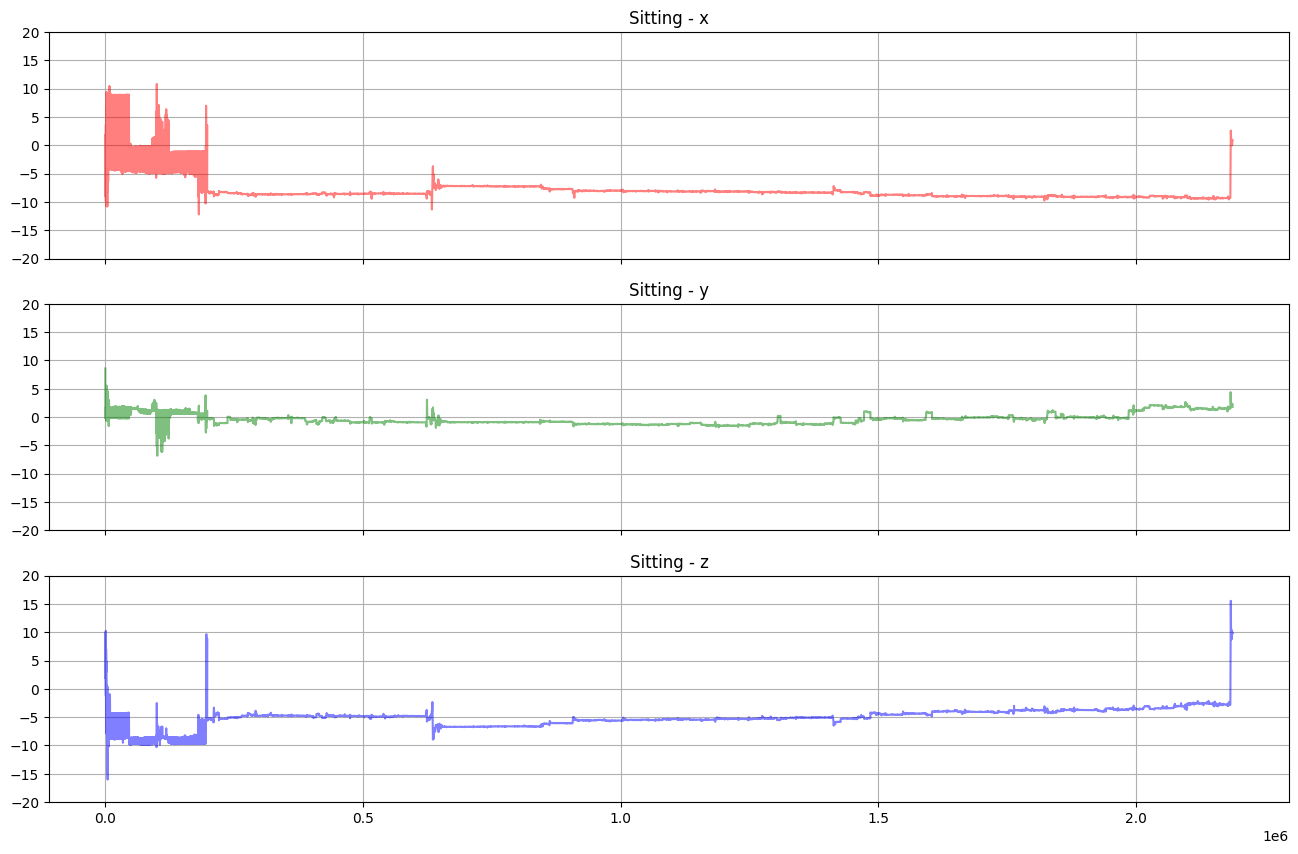

In [17]:
for activity in df['activity'].unique():
    df_temp = df[df['activity'] == activity]
    df_temp.reset_index(inplace=True)
    
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16, 10), sharex=True)
    
    time = df_temp['Time since start in ms '].values
    
    ax1.plot(time, df_temp['ACCELEROMETER X (m/s²)'], color='red', alpha=0.5)
    ax1.set_ylim(-20,20)
    ax1.set_title(activity + ' - x')
    ax1.grid()
    
    ax2.plot(time, df_temp['ACCELEROMETER Y (m/s²)'], color='green', alpha=0.5)
    ax2.set_ylim(-20,20)
    ax2.set_title(activity + ' - y')
    ax2.grid()

    ax3.plot(time, df_temp['ACCELEROMETER Z (m/s²)'], color='blue', alpha=0.5)
    ax3.set_ylim(-20,20)    
    ax3.set_title(activity + ' - z')
    ax3.grid()
    
    plt.show()

## **Remove Time**

In [18]:
if USE_ALL_DATA:
    # we don't want the time column's 
    to_drop = df.columns[[-2,-3]]
    to_drop

    df.drop(to_drop, axis=1, inplace=True)
    df.head()
else:
    # only use the gyroscope data
    df = df.iloc[:, [0, 1, 2, -1]]
df

,ACCELEROMETER X (m/s²),ACCELEROMETER Y (m/s²),ACCELEROMETER Z (m/s²),GRAVITY X (m/s²),GRAVITY Y (m/s²),GRAVITY Z (m/s²),LINEAR ACCELERATION X (m/s²),LINEAR ACCELERATION Y (m/s²),LINEAR ACCELERATION Z (m/s²),GYROSCOPE X (rad/s),GYROSCOPE Y (rad/s),GYROSCOPE Z (rad/s),activity
0,1.6986,1.3283,7.0998,1.3923,2.1992,9.4549,0.2390,-0.8760,-1.7939,0.6817,-0.0350,0.3251,Walking
1,-0.3003,2.3495,7.4195,-0.9400,2.9550,9.3035,-0.8070,0.0004,1.3390,-0.0641,-0.5154,0.2862,Walking
2,0.0323,2.6892,10.9866,-0.5112,4.3556,8.7714,0.8482,-0.2409,0.9526,-0.0594,0.0330,0.4493,Walking
3,1.1324,4.1749,10.4611,-0.3020,4.2144,8.8497,-0.5431,0.3624,0.2033,0.4714,-0.4152,0.2851,Walking
4,-2.7820,4.5281,6.5145,-0.9010,4.0817,8.8712,-1.0443,-1.0017,-1.8377,0.5447,0.3961,0.4867,Walking
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17190,0.2710,2.3700,8.7320,0.0980,2.3760,9.5140,0.1760,-0.2830,0.1830,-0.4950,0.7170,-0.0620,Sitting
17191,0.6700,1.9920,9.9050,0.4720,2.2380,9.5360,0.1960,-0.1330,0.2770,-0.1750,0.0130,-0.2060,Sitting
17192,-0.0020,2.0760,10.2180,0.3900,2.1740,9.5550,-0.3920,-0.0990,0.6640,0.0740,-0.0790,0.0370,Sitting
17193,0.6900,2.3650,9.7710,0.5380,2.5030,9.4670,0.1510,-0.1380,0.3040,0.0460,-0.0540,-0.0780,Sitting


In [60]:
activity


'Sitting'

## **Segmentation**

In [19]:
window = 1                 # window dimention in seconds 
fs = 20                    # frequency in Hz
windows_size = window * fs # number of samples for each time window

In [20]:
if SEGMENT_ALL_DATA:
    columns_to_segment = df.columns[:-1]
else:
    columns_to_segment = df.columns[:3]

In [21]:
windows_size = fs * window + 1 
df_segments =  pd.DataFrame()
sub_segments = pd.DataFrame()
# Extract the Activity classes for each created window 
tmp_class = df['activity'].values

tmp_class = tmp_class[0:int(len(tmp_class)/windows_size)*windows_size].reshape((int(len(tmp_class)/windows_size),windows_size))

tmp_class = pd.DataFrame(tmp_class).mode(axis=1)
print(columns_to_segment)
for col_id in columns_to_segment:
    # Create list with columns names
    columns = []
    for i in range(0,windows_size):
        columns.append(col_id + "-" + str(i))
    # Segment data for each column ofthe raw data 
    tmp_vals = df[col_id].values
    tmp_vals = tmp_vals[0:int(len(tmp_vals)/windows_size)*windows_size].reshape((int(len(tmp_vals)/windows_size),windows_size))       
    tmp_vals = pd.DataFrame(tmp_vals)
    tmp_vals.columns = columns

    sub_segments = pd.concat([sub_segments,tmp_vals],axis=1)

sub_segments['activity'] = tmp_class
df_segments = pd.concat([df_segments,sub_segments],axis=0)

df_segments = df_segments.reset_index(drop=True)
display(df_segments)

Index(['ACCELEROMETER X (m/s²)', 'ACCELEROMETER Y (m/s²)',
       'ACCELEROMETER Z (m/s²)'],
      dtype='object')


,ACCELEROMETER X (m/s²)-0,ACCELEROMETER X (m/s²)-1,ACCELEROMETER X (m/s²)-2,ACCELEROMETER X (m/s²)-3,ACCELEROMETER X (m/s²)-4,ACCELEROMETER X (m/s²)-5,ACCELEROMETER X (m/s²)-6,ACCELEROMETER X (m/s²)-7,ACCELEROMETER X (m/s²)-8,ACCELEROMETER X (m/s²)-9,...,ACCELEROMETER Z (m/s²)-12,ACCELEROMETER Z (m/s²)-13,ACCELEROMETER Z (m/s²)-14,ACCELEROMETER Z (m/s²)-15,ACCELEROMETER Z (m/s²)-16,ACCELEROMETER Z (m/s²)-17,ACCELEROMETER Z (m/s²)-18,ACCELEROMETER Z (m/s²)-19,ACCELEROMETER Z (m/s²)-20,activity
0,1.6986,-0.3003,0.0323,1.1324,-2.7820,-3.5539,-4.0053,0.8656,-0.0048,1.3038,...,12.8303,12.9320,9.2378,6.1364,9.0906,13.8571,9.2282,11.9396,9.2186,Walking
1,4.1707,2.8609,5.8705,1.0008,-1.1145,0.5734,0.1259,0.5411,0.0960,-0.4056,...,11.3853,7.8972,8.1604,7.9989,7.6935,8.9315,8.2430,11.9372,7.8601,Walking
2,-1.5105,2.1021,0.8273,4.9032,8.2777,10.5664,0.6502,0.1834,0.5016,-2.6776,...,1.9119,-0.8533,0.9975,1.9454,3.5112,9.7729,11.3937,11.7936,10.4240,Walking
3,0.1738,-0.5037,2.9330,0.6849,0.8297,-0.3326,-4.3283,1.0499,-0.2201,1.9442,...,7.1668,10.1333,10.7055,7.4590,11.5995,13.4791,8.8693,11.4823,8.3761,Walking
4,1.5646,1.3935,0.2922,0.7974,0.5148,-1.0328,-0.2177,-1.4399,-0.8569,0.1092,...,7.9068,7.3669,10.6229,6.1496,10.7198,9.9619,9.0583,8.0480,7.3370,Walking
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-9.2850,-9.2850,-9.2850,-9.3540,-9.2610,-9.2900,-9.3040,-9.2660,-9.2900,-9.4140,...,-2.6910,-2.6910,-2.7010,-2.7030,-2.7700,-2.6790,-2.6460,-2.9110,-2.7270,Sitting
496,-9.3570,-9.3370,-9.3610,-9.3180,-9.3180,-9.3010,-9.3180,-9.2970,-9.3060,-9.3330,...,-2.7460,-2.7580,-2.7610,-2.7460,-2.7460,-2.7460,-2.7460,-2.7460,-2.7460,Sitting
497,-9.3010,-9.2990,-9.2970,-9.2940,-9.2920,-9.2920,-9.2920,-9.2920,-9.2920,-9.2920,...,-2.9710,-2.9710,-2.9710,-2.9710,-2.9710,-2.9710,-2.9710,-2.9710,-2.9710,Sitting
498,-9.2920,-9.2920,-9.2920,-9.2920,-9.2920,-9.2920,-9.2920,-9.2920,-9.2920,-9.2920,...,-3.0170,-2.8560,-3.0140,-2.3560,-2.4440,-2.7250,-2.7800,-2.7170,-2.7510,Sitting


In [22]:
df_segments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ACCELEROMETER X (m/s²)-0   500 non-null    float64
 1   ACCELEROMETER X (m/s²)-1   500 non-null    float64
 2   ACCELEROMETER X (m/s²)-2   500 non-null    float64
 3   ACCELEROMETER X (m/s²)-3   500 non-null    float64
 4   ACCELEROMETER X (m/s²)-4   500 non-null    float64
 5   ACCELEROMETER X (m/s²)-5   500 non-null    float64
 6   ACCELEROMETER X (m/s²)-6   500 non-null    float64
 7   ACCELEROMETER X (m/s²)-7   500 non-null    float64
 8   ACCELEROMETER X (m/s²)-8   500 non-null    float64
 9   ACCELEROMETER X (m/s²)-9   500 non-null    float64
 10  ACCELEROMETER X (m/s²)-10  500 non-null    float64
 11  ACCELEROMETER X (m/s²)-11  500 non-null    float64
 12  ACCELEROMETER X (m/s²)-12  500 non-null    float64
 13  ACCELEROMETER X (m/s²)-13  500 non-null    float64

## **Feature Extraction**

In [23]:
if FEATURE_EXTRACTION:
    import time
    import tsfel

In [24]:
def Convert(lst):
    res_dct = {lst[i]: i for i in range(0, len(lst))}
    return res_dct

# Driver code

res_dct = Convert(df.activity.unique())
res_dct 

{'Walking': 0, 'Jogging': 1, 'Sitting': 2}

In [25]:
def get_activity_by_id(id):
    return list(res_dct.keys())[list(res_dct.values()).index(id)]

get_activity_by_id(0)

'Walking'

In [26]:
if USE_SEGMENTED_DATA:
    df = df_segments.copy()

if FEATURE_EXTRACTION:
    df.activity = df.activity.map(res_dct)
    display(df.activity.unique())
    display(df.head())

array([0, 1, 2])

,ACCELEROMETER X (m/s²),ACCELEROMETER Y (m/s²),ACCELEROMETER Z (m/s²),GRAVITY X (m/s²),GRAVITY Y (m/s²),GRAVITY Z (m/s²),LINEAR ACCELERATION X (m/s²),LINEAR ACCELERATION Y (m/s²),LINEAR ACCELERATION Z (m/s²),GYROSCOPE X (rad/s),GYROSCOPE Y (rad/s),GYROSCOPE Z (rad/s),activity
0,1.6986,1.3283,7.0998,1.3923,2.1992,9.4549,0.2390,-0.8760,-1.7939,0.6817,-0.0350,0.3251,0
1,-0.3003,2.3495,7.4195,-0.9400,2.9550,9.3035,-0.8070,0.0004,1.3390,-0.0641,-0.5154,0.2862,0
2,0.0323,2.6892,10.9866,-0.5112,4.3556,8.7714,0.8482,-0.2409,0.9526,-0.0594,0.0330,0.4493,0
3,1.1324,4.1749,10.4611,-0.3020,4.2144,8.8497,-0.5431,0.3624,0.2033,0.4714,-0.4152,0.2851,0
4,-2.7820,4.5281,6.5145,-0.9010,4.0817,8.8712,-1.0443,-1.0017,-1.8377,0.5447,0.3961,0.4867,0


In [27]:
import warnings

# disable the FutureWarning for the append() method
warnings.filterwarnings('ignore', message='The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.')

In [28]:
if FEATURE_EXTRACTION:
    t1 = time.time()
    # Retrieves a pre-defined feature configuration file to extract all available features
    # Available domains: "statistical"; "spectral"; "temporal"
    cfg_file = tsfel.get_features_by_domain()

    df_features =  []
    
    # Extract the Activity classes for each created window 
    tmp_class = df['activity'].values
    tmp_class = tmp_class[0:int(len(tmp_class)/windows_size)*windows_size].reshape((int(len(tmp_class)/windows_size),windows_size))
    tmp_class = pd.DataFrame(tmp_class).mode(axis=1)

    # Extract features
    tmp_features = tsfel.time_series_features_extractor(cfg_file, df.iloc[0:,:-1], fs = fs, window_size=windows_size, header_names = df.columns[:-1].values, n_jobs = -1)

    tmp_features['activity'] = tmp_class
    df_features.append(tmp_features)

    df_features = pd.concat(df_features,axis=0)
    t2 = time.time()
    print('Elapsed time [s]:', np.round(t2-t1,4))

    del tmp_class, t1, t2, tmp_features

    display(df_features.head(5))
    display(df_features.shape)

*** Feature extraction started ***


/usr/local/lib/python3.10/dist-packages/tsfel/feature_extraction/features.py:520: RuntimeWarning:

Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.

/usr/local/lib/python3.10/dist-packages/tsfel/feature_extraction/features.py:540: RuntimeWarning:

Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.

/usr/local/lib/python3.10/dist-packages/tsfel/feature_extraction/features.py:520: RuntimeWarning:

Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.

/usr/local/lib/python3.10/dist-packages/tsfel/feature_extraction/features.py:540: RuntimeWarning:

Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results 


*** Feature extraction finished ***
Elapsed time [s]: 180.9483


,ACCELEROMETER X (m/s²)_Absolute energy,ACCELEROMETER X (m/s²)_Area under the curve,ACCELEROMETER X (m/s²)_Autocorrelation,ACCELEROMETER X (m/s²)_Centroid,ACCELEROMETER X (m/s²)_ECDF Percentile Count_0,ACCELEROMETER X (m/s²)_ECDF Percentile Count_1,ACCELEROMETER X (m/s²)_ECDF Percentile_0,ACCELEROMETER X (m/s²)_ECDF Percentile_1,ACCELEROMETER X (m/s²)_ECDF_0,ACCELEROMETER X (m/s²)_ECDF_1,...,LINEAR ACCELERATION Z (m/s²)_Wavelet variance_1,LINEAR ACCELERATION Z (m/s²)_Wavelet variance_2,LINEAR ACCELERATION Z (m/s²)_Wavelet variance_3,LINEAR ACCELERATION Z (m/s²)_Wavelet variance_4,LINEAR ACCELERATION Z (m/s²)_Wavelet variance_5,LINEAR ACCELERATION Z (m/s²)_Wavelet variance_6,LINEAR ACCELERATION Z (m/s²)_Wavelet variance_7,LINEAR ACCELERATION Z (m/s²)_Wavelet variance_8,LINEAR ACCELERATION Z (m/s²)_Zero crossing rate,activity
0,104.365046,1.492525,104.365046,0.585310,4.0,16.0,-2.7820,1.1324,0.047619,0.095238,...,12.018678,11.673427,6.926520,3.766578,2.077798,1.165893,0.680171,0.432936,5.0,0
1,143.770576,1.657593,143.770576,0.477808,4.0,16.0,-0.4056,3.0479,0.047619,0.095238,...,9.216204,5.747011,2.932509,2.488955,2.239188,1.870222,1.508862,1.220018,5.0,0
2,526.323990,3.108857,526.323990,0.515807,4.0,16.0,-2.0671,4.9032,0.047619,0.095238,...,7.976561,14.029716,21.508456,23.683858,21.626004,18.244765,15.038374,12.426383,6.0,0
3,60.385449,0.896955,60.385449,0.449819,4.0,16.0,-0.5037,0.9936,0.047619,0.095238,...,12.373108,8.822802,3.489646,2.048533,1.562216,1.158798,0.822866,0.582410,9.0,0
4,33.882036,0.897033,33.882036,0.581600,4.0,16.0,-1.4399,0.1092,0.047619,0.095238,...,8.587943,6.976859,2.250449,0.726928,0.499697,0.450675,0.394511,0.336724,6.0,0


(500, 1729)

In [29]:
import os

if USE_ALL_DATA:
    filename = "/content/drive/MyDrive/0529_har_processed/ihr_features_all.csv"
else:
    filename = "/content/drive/MyDrive/0529_har_processed/ihr_features.csv"

if SAVE_FEATURES:
    # make folder if not exists
    df_features.to_csv(filename,index=False)
    file_size = os.path.getsize(filename) / 1000000
    print('Features saved to ' + filename + ' with size ' + str(round(file_size, 2)) + ' MB')

Features saved to /content/drive/MyDrive/0529_har_processed/ihr_features_all.csv with size 14.39 MB


## **Train-Test Split**

In [30]:
if not FEATURE_EXTRACTION:
    df_features = pd.read_csv(filename)
df_features

,ACCELEROMETER X (m/s²)_Absolute energy,ACCELEROMETER X (m/s²)_Area under the curve,ACCELEROMETER X (m/s²)_Autocorrelation,ACCELEROMETER X (m/s²)_Centroid,ACCELEROMETER X (m/s²)_ECDF Percentile Count_0,ACCELEROMETER X (m/s²)_ECDF Percentile Count_1,ACCELEROMETER X (m/s²)_ECDF Percentile_0,ACCELEROMETER X (m/s²)_ECDF Percentile_1,ACCELEROMETER X (m/s²)_ECDF_0,ACCELEROMETER X (m/s²)_ECDF_1,...,LINEAR ACCELERATION Z (m/s²)_Wavelet variance_1,LINEAR ACCELERATION Z (m/s²)_Wavelet variance_2,LINEAR ACCELERATION Z (m/s²)_Wavelet variance_3,LINEAR ACCELERATION Z (m/s²)_Wavelet variance_4,LINEAR ACCELERATION Z (m/s²)_Wavelet variance_5,LINEAR ACCELERATION Z (m/s²)_Wavelet variance_6,LINEAR ACCELERATION Z (m/s²)_Wavelet variance_7,LINEAR ACCELERATION Z (m/s²)_Wavelet variance_8,LINEAR ACCELERATION Z (m/s²)_Zero crossing rate,activity
0,104.365046,1.492525,104.365046,0.585310,4.000,16.000,-2.7820,1.1324,0.047619,0.095238,...,12.018678,11.673427,6.926520,3.766578,2.077798,1.165893,0.680171,0.432936,5.0,0
1,143.770576,1.657593,143.770576,0.477808,4.000,16.000,-0.4056,3.0479,0.047619,0.095238,...,9.216204,5.747011,2.932509,2.488955,2.239188,1.870222,1.508862,1.220018,5.0,0
2,526.323990,3.108857,526.323990,0.515807,4.000,16.000,-2.0671,4.9032,0.047619,0.095238,...,7.976561,14.029716,21.508456,23.683858,21.626004,18.244765,15.038374,12.426383,6.0,0
3,60.385449,0.896955,60.385449,0.449819,4.000,16.000,-0.5037,0.9936,0.047619,0.095238,...,12.373108,8.822802,3.489646,2.048533,1.562216,1.158798,0.822866,0.582410,9.0,0
4,33.882036,0.897033,33.882036,0.581600,4.000,16.000,-1.4399,0.1092,0.047619,0.095238,...,8.587943,6.976859,2.250449,0.726928,0.499697,0.450675,0.394511,0.336724,6.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1819.172335,9.308050,1819.172335,0.500323,4.000,16.000,-9.3370,-9.2850,0.047619,0.095238,...,0.010368,0.012278,0.014219,0.017283,0.018431,0.017894,0.016626,0.015199,4.0,2
496,1822.012361,9.313825,1822.012361,0.499184,4.000,16.000,-9.3330,-9.3040,0.047619,0.095238,...,0.000543,0.000833,0.000780,0.000741,0.000726,0.000699,0.000662,0.000621,11.0,2
497,1813.594135,9.292925,1813.594135,0.499894,4.000,16.000,-9.2940,-9.2920,0.047619,0.095238,...,0.003438,0.005599,0.007557,0.009639,0.011156,0.011857,0.011953,0.011697,4.0,2
498,1811.186665,9.286150,1811.186665,0.500370,-9.292,-9.292,-9.2920,-9.2920,0.047619,0.095238,...,0.006371,0.010519,0.013021,0.015228,0.016355,0.016371,0.015745,0.014854,4.0,2


In [31]:
# add the activity names back to the dataframe
df_features['activity'] = df_features['activity'].map(get_activity_by_id)

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_features.iloc[0:,0:-1], df_features['activity'], 
                test_size=0.15, random_state=42)

In [35]:
print('Train Dataset: ', X_train.shape, y_train.shape[0])
print('Test Dataset: ', X_test.shape, y_test.shape[0])

Train Dataset:  (425, 1728) 425
Test Dataset:  (75, 1728) 75


In [36]:
features_names = df_features.columns[0:-1].values

## **Scaling**

In [37]:
from sklearn.preprocessing import StandardScaler

**Scale the X_train**

In [38]:
features_columns = df_features.columns.values

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_train = pd.DataFrame(X_train, columns=features_names)

In [40]:
X_train

,ACCELEROMETER X (m/s²)_Absolute energy,ACCELEROMETER X (m/s²)_Area under the curve,ACCELEROMETER X (m/s²)_Autocorrelation,ACCELEROMETER X (m/s²)_Centroid,ACCELEROMETER X (m/s²)_ECDF Percentile Count_0,ACCELEROMETER X (m/s²)_ECDF Percentile Count_1,ACCELEROMETER X (m/s²)_ECDF Percentile_0,ACCELEROMETER X (m/s²)_ECDF Percentile_1,ACCELEROMETER X (m/s²)_ECDF_0,ACCELEROMETER X (m/s²)_ECDF_1,...,LINEAR ACCELERATION Z (m/s²)_Wavelet variance_0,LINEAR ACCELERATION Z (m/s²)_Wavelet variance_1,LINEAR ACCELERATION Z (m/s²)_Wavelet variance_2,LINEAR ACCELERATION Z (m/s²)_Wavelet variance_3,LINEAR ACCELERATION Z (m/s²)_Wavelet variance_4,LINEAR ACCELERATION Z (m/s²)_Wavelet variance_5,LINEAR ACCELERATION Z (m/s²)_Wavelet variance_6,LINEAR ACCELERATION Z (m/s²)_Wavelet variance_7,LINEAR ACCELERATION Z (m/s²)_Wavelet variance_8,LINEAR ACCELERATION Z (m/s²)_Zero crossing rate
0,0.276427,0.502434,0.276427,0.061964,0.289252,0.293443,-0.330157,-0.534686,-6.938894e-18,-1.387779e-17,...,-0.252236,-0.231193,-0.256716,-0.253253,-0.242855,-0.235089,-0.228562,-0.222986,-0.218556,0.271241
1,0.205436,0.455100,0.205436,0.055208,0.289252,0.293443,-0.293590,-0.504933,-6.938894e-18,-1.387779e-17,...,-0.252324,-0.231202,-0.256746,-0.253269,-0.242862,-0.235091,-0.228562,-0.222986,-0.218556,0.796422
2,6.799190,0.836347,6.799190,-1.293993,0.289252,0.293443,-1.540182,3.559724,-6.938894e-18,-1.387779e-17,...,3.222098,2.169748,6.326535,9.556850,10.589408,10.867471,10.893816,10.805792,10.663413,1.321604
3,0.844173,0.854960,0.844173,0.063077,0.289252,0.293443,-0.741973,-0.746897,-6.938894e-18,-1.387779e-17,...,-0.252358,-0.231121,-0.256514,-0.252892,-0.242381,-0.234539,-0.227962,-0.222355,-0.217909,-0.516531
4,0.851343,0.858272,0.851343,0.071651,0.289252,0.293443,-0.755468,-0.744272,-6.938894e-18,-1.387779e-17,...,-0.252322,-0.231014,-0.256307,-0.252723,-0.242338,-0.234618,-0.228137,-0.222601,-0.218200,-0.253941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,-1.631291,-1.592372,-1.631291,-2.534723,0.289252,0.293443,1.185204,1.214132,-6.938894e-18,-1.387779e-17,...,-0.252261,-0.231173,-0.256671,-0.253199,-0.242807,-0.235046,-0.228521,-0.222943,-0.218509,1.321604
421,0.200352,0.451081,0.200352,0.079434,0.289252,0.293443,-0.269647,-0.507558,-6.938894e-18,-1.387779e-17,...,-0.252348,-0.231194,-0.256712,-0.253237,-0.242830,-0.235058,-0.228530,-0.222956,-0.218529,-0.253941
422,0.340341,0.543460,0.340341,0.068030,-3.404484,-3.414232,-0.367595,-0.565096,-6.938894e-18,-1.387779e-17,...,-0.252384,-0.231230,-0.256748,-0.253271,-0.242866,-0.235097,-0.228571,-0.222997,-0.218569,-1.304304
423,0.851751,0.858710,0.851751,0.037049,0.289252,0.293443,-0.768093,-0.743835,-6.938894e-18,-1.387779e-17,...,-0.252062,-0.229896,-0.253891,-0.249762,-0.239214,-0.231363,-0.224751,-0.219098,-0.214602,-0.253941


**Scale the X_test**

In [41]:
features_columns = df_features.columns.values

scaler = StandardScaler()

scaler.fit(X_test)

X_test = scaler.transform(X_test)
X_test = pd.DataFrame(X_test, columns=features_names)

In [42]:
X_test

,ACCELEROMETER X (m/s²)_Absolute energy,ACCELEROMETER X (m/s²)_Area under the curve,ACCELEROMETER X (m/s²)_Autocorrelation,ACCELEROMETER X (m/s²)_Centroid,ACCELEROMETER X (m/s²)_ECDF Percentile Count_0,ACCELEROMETER X (m/s²)_ECDF Percentile Count_1,ACCELEROMETER X (m/s²)_ECDF Percentile_0,ACCELEROMETER X (m/s²)_ECDF Percentile_1,ACCELEROMETER X (m/s²)_ECDF_0,ACCELEROMETER X (m/s²)_ECDF_1,...,LINEAR ACCELERATION Z (m/s²)_Wavelet variance_0,LINEAR ACCELERATION Z (m/s²)_Wavelet variance_1,LINEAR ACCELERATION Z (m/s²)_Wavelet variance_2,LINEAR ACCELERATION Z (m/s²)_Wavelet variance_3,LINEAR ACCELERATION Z (m/s²)_Wavelet variance_4,LINEAR ACCELERATION Z (m/s²)_Wavelet variance_5,LINEAR ACCELERATION Z (m/s²)_Wavelet variance_6,LINEAR ACCELERATION Z (m/s²)_Wavelet variance_7,LINEAR ACCELERATION Z (m/s²)_Wavelet variance_8,LINEAR ACCELERATION Z (m/s²)_Zero crossing rate
0,-0.067952,0.477896,-0.067952,0.177753,0.265154,0.266726,-0.191367,-0.632278,6.938894e-18,1.387779e-17,...,-0.339878,-0.352924,-0.412435,-0.409825,-0.379210,-0.368519,-0.361704,-0.356235,-0.352806,-1.128197
1,1.067293,-0.237590,1.067293,-2.071757,0.265154,0.266726,-2.196574,1.686127,6.938894e-18,1.387779e-17,...,2.419668,2.656455,2.375987,1.730550,1.932304,2.271260,2.519636,2.682209,2.785895,1.375199
2,0.053262,0.634674,0.053262,0.039685,0.265154,0.266726,-0.349673,-0.707864,6.938894e-18,1.387779e-17,...,-0.340300,-0.353484,-0.413035,-0.410109,-0.379238,-0.368436,-0.361572,-0.356091,-0.352672,0.123501
3,-0.443909,-0.365023,-0.443909,1.335074,0.265154,0.266726,-0.144527,0.525740,6.938894e-18,1.387779e-17,...,-0.340409,-0.353670,-0.413614,-0.411163,-0.380363,-0.369564,-0.362696,-0.357208,-0.353780,0.123501
4,-0.939687,-1.092796,-0.939687,-0.712995,0.265154,0.266726,0.913809,-0.024203,6.938894e-18,1.387779e-17,...,-0.340406,-0.353643,-0.413582,-0.411113,-0.380291,-0.369466,-0.362569,-0.357050,-0.353591,-0.627518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,-0.061601,0.490354,-0.061601,0.054894,-3.819869,-3.788538,-0.221309,-0.648555,6.938894e-18,1.387779e-17,...,-0.340413,-0.353661,-0.413597,-0.411152,-0.380359,-0.369556,-0.362674,-0.357163,-0.353710,-1.378537
71,-0.105262,0.433327,-0.105262,0.044595,0.265154,0.266726,-0.179212,-0.621157,6.938894e-18,1.387779e-17,...,-0.340304,-0.353516,-0.413369,-0.410816,-0.380020,-0.369235,-0.362377,-0.356895,-0.353470,-0.126839
72,-0.206770,0.296519,-0.206770,-0.025317,0.265154,0.266726,-0.099763,-0.552018,6.938894e-18,1.387779e-17,...,-0.340408,-0.353649,-0.413575,-0.411082,-0.380248,-0.369418,-0.362521,-0.357006,-0.353556,-0.877857
73,-0.139444,0.387910,-0.139444,0.029543,0.265154,0.266726,-0.145120,-0.604557,6.938894e-18,1.387779e-17,...,-0.340397,-0.353648,-0.413566,-0.411102,-0.380316,-0.369532,-0.362677,-0.357201,-0.353783,0.373840


In [43]:
import tsfel

Remove Highly Correlated Features

In [44]:
corr_train = pd.DataFrame(columns=X_train.columns)
corr_train = corr_train.sort_index()
corr_train.loc[0] = np.nan
corr_train

,ACCELEROMETER X (m/s²)_Absolute energy,ACCELEROMETER X (m/s²)_Area under the curve,ACCELEROMETER X (m/s²)_Autocorrelation,ACCELEROMETER X (m/s²)_Centroid,ACCELEROMETER X (m/s²)_ECDF Percentile Count_0,ACCELEROMETER X (m/s²)_ECDF Percentile Count_1,ACCELEROMETER X (m/s²)_ECDF Percentile_0,ACCELEROMETER X (m/s²)_ECDF Percentile_1,ACCELEROMETER X (m/s²)_ECDF_0,ACCELEROMETER X (m/s²)_ECDF_1,...,LINEAR ACCELERATION Z (m/s²)_Wavelet variance_0,LINEAR ACCELERATION Z (m/s²)_Wavelet variance_1,LINEAR ACCELERATION Z (m/s²)_Wavelet variance_2,LINEAR ACCELERATION Z (m/s²)_Wavelet variance_3,LINEAR ACCELERATION Z (m/s²)_Wavelet variance_4,LINEAR ACCELERATION Z (m/s²)_Wavelet variance_5,LINEAR ACCELERATION Z (m/s²)_Wavelet variance_6,LINEAR ACCELERATION Z (m/s²)_Wavelet variance_7,LINEAR ACCELERATION Z (m/s²)_Wavelet variance_8,LINEAR ACCELERATION Z (m/s²)_Zero crossing rate
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
tmp = X_train.copy()
corr_features_train = tsfel.correlated_features(tmp)
corr_train.loc[0][corr_features_train] = 1
    
corr_train = corr_train.fillna(0)
corr_train

,ACCELEROMETER X (m/s²)_Absolute energy,ACCELEROMETER X (m/s²)_Area under the curve,ACCELEROMETER X (m/s²)_Autocorrelation,ACCELEROMETER X (m/s²)_Centroid,ACCELEROMETER X (m/s²)_ECDF Percentile Count_0,ACCELEROMETER X (m/s²)_ECDF Percentile Count_1,ACCELEROMETER X (m/s²)_ECDF Percentile_0,ACCELEROMETER X (m/s²)_ECDF Percentile_1,ACCELEROMETER X (m/s²)_ECDF_0,ACCELEROMETER X (m/s²)_ECDF_1,...,LINEAR ACCELERATION Z (m/s²)_Wavelet variance_0,LINEAR ACCELERATION Z (m/s²)_Wavelet variance_1,LINEAR ACCELERATION Z (m/s²)_Wavelet variance_2,LINEAR ACCELERATION Z (m/s²)_Wavelet variance_3,LINEAR ACCELERATION Z (m/s²)_Wavelet variance_4,LINEAR ACCELERATION Z (m/s²)_Wavelet variance_5,LINEAR ACCELERATION Z (m/s²)_Wavelet variance_6,LINEAR ACCELERATION Z (m/s²)_Wavelet variance_7,LINEAR ACCELERATION Z (m/s²)_Wavelet variance_8,LINEAR ACCELERATION Z (m/s²)_Zero crossing rate
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0


In [46]:
to_drop = corr_train.columns[corr_train.sum()>0]
print(len(to_drop),to_drop)
X_train = X_train.drop(to_drop,axis=1)
X_test = X_test.drop(to_drop,axis=1)

659 Index(['ACCELEROMETER X (m/s²)_Autocorrelation',
       'ACCELEROMETER X (m/s²)_ECDF Percentile Count_1',
       'ACCELEROMETER X (m/s²)_LPCC_11', 'ACCELEROMETER X (m/s²)_LPCC_2',
       'ACCELEROMETER X (m/s²)_LPCC_7', 'ACCELEROMETER X (m/s²)_LPCC_8',
       'ACCELEROMETER X (m/s²)_LPCC_9', 'ACCELEROMETER X (m/s²)_Mean',
       'ACCELEROMETER X (m/s²)_Mean absolute diff',
       'ACCELEROMETER X (m/s²)_Median',
       ...
       'LINEAR ACCELERATION Z (m/s²)_Wavelet standard deviation_4',
       'LINEAR ACCELERATION Z (m/s²)_Wavelet standard deviation_5',
       'LINEAR ACCELERATION Z (m/s²)_Wavelet standard deviation_6',
       'LINEAR ACCELERATION Z (m/s²)_Wavelet standard deviation_7',
       'LINEAR ACCELERATION Z (m/s²)_Wavelet standard deviation_8',
       'LINEAR ACCELERATION Z (m/s²)_Wavelet variance_4',
       'LINEAR ACCELERATION Z (m/s²)_Wavelet variance_5',
       'LINEAR ACCELERATION Z (m/s²)_Wavelet variance_6',
       'LINEAR ACCELERATION Z (m/s²)_Wavelet variance_7

In [47]:
to_drop_X_train = X_train.columns[X_train.std()==0]
print(len(to_drop_X_train),to_drop_X_train)
X_train = X_train.drop(to_drop_X_train,axis=1)
X_test = X_test.drop(to_drop_X_train,axis=1)

120 Index(['ACCELEROMETER X (m/s²)_ECDF_0', 'ACCELEROMETER X (m/s²)_ECDF_1',
       'ACCELEROMETER X (m/s²)_ECDF_2', 'ACCELEROMETER X (m/s²)_ECDF_3',
       'ACCELEROMETER X (m/s²)_ECDF_4', 'ACCELEROMETER X (m/s²)_ECDF_5',
       'ACCELEROMETER X (m/s²)_ECDF_6', 'ACCELEROMETER X (m/s²)_ECDF_7',
       'ACCELEROMETER X (m/s²)_ECDF_8', 'ACCELEROMETER X (m/s²)_ECDF_9',
       ...
       'LINEAR ACCELERATION Z (m/s²)_ECDF_0',
       'LINEAR ACCELERATION Z (m/s²)_ECDF_1',
       'LINEAR ACCELERATION Z (m/s²)_ECDF_2',
       'LINEAR ACCELERATION Z (m/s²)_ECDF_3',
       'LINEAR ACCELERATION Z (m/s²)_ECDF_4',
       'LINEAR ACCELERATION Z (m/s²)_ECDF_5',
       'LINEAR ACCELERATION Z (m/s²)_ECDF_6',
       'LINEAR ACCELERATION Z (m/s²)_ECDF_7',
       'LINEAR ACCELERATION Z (m/s²)_ECDF_8',
       'LINEAR ACCELERATION Z (m/s²)_ECDF_9'],
      dtype='object', length=120)


In [56]:
import tensorflow as tf
import numpy as np
import pandas as pd


In [62]:
len(activity)

7

## **Model Building**

In [ ]:
# build the model and train it
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, activation='relu')) # relu is used for performance
model.add(tf.keras.layers.Dense(15, activation='relu'))
model.add(tf.keras.layers.Dense(NUM_GESTURES, activation='softmax')) # softmax is used, because we only expect one gesture to occur per input
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history = model.fit(X_train, y_train, epochs=600, batch_size=1, validation_data=(inputs_validate, outputs_validate))
